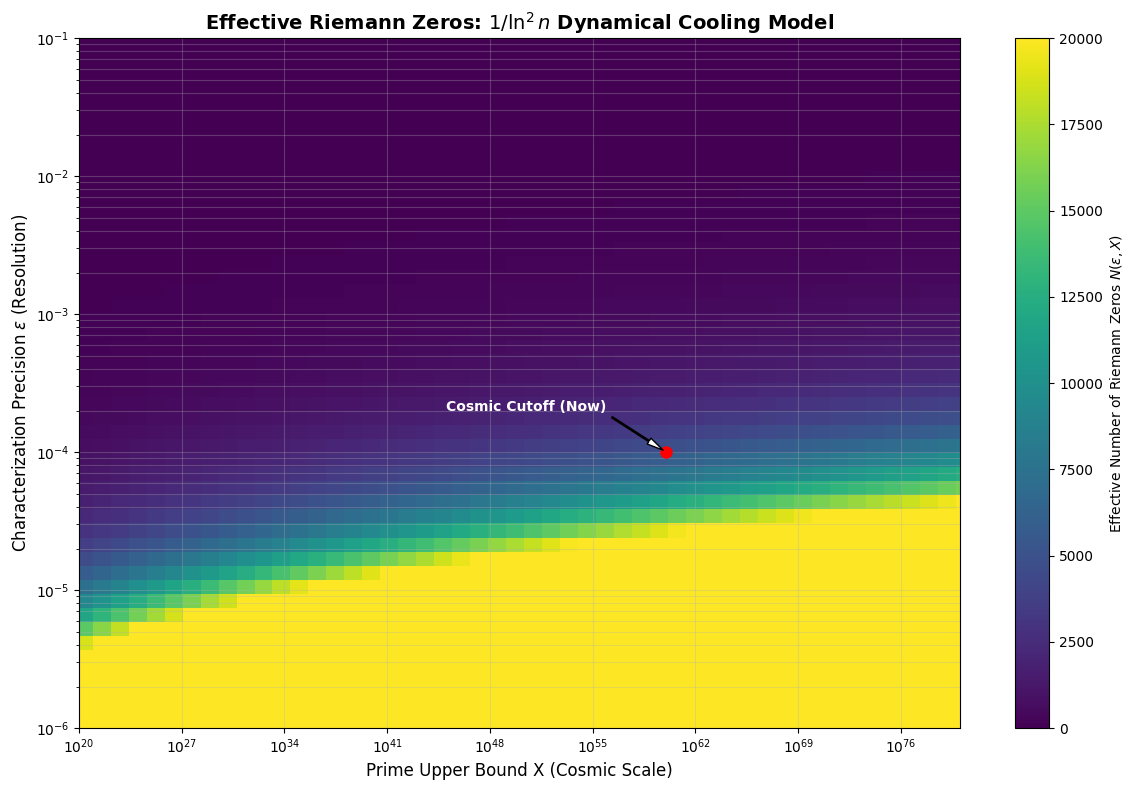

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# ========== 跨系统字体配置 ==========
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei', 'DejaVu Sans', 'Ubuntu', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300

# ========== 核心函数：基于 1/ln^2 模型的精确匹配 ==========
def calculate_effective_zeros(epsilon, X):
    """
    基于二阶对数冷却模型 (1/ln^2) 的校准：
    - 在当前宇宙尺度 X=10^60, ε=10^-4 下，预测 N ≈ 5300
    - 相比 1/ln 模型，高尺度下的有效零点涌现速度更快
    """
    # k = 2 / alpha (alpha=1.15) ≈ 1.74, 对应 1/ln^2 的动力学缩放指数
    k = 1.74
    # 校准系数 C：确保在 X=10^60, ε=1e-4 时 N ≈ 5300
    C = 0.0004192  
    
    # 计算公式：N ∝ (log10 X)^k / ε
    log_X = np.log10(X)
    
    # === 修复点在这里：去掉 np. 前缀，直接使用变量 log_X ===
    N = C * (log_X**k / epsilon)
    
    # 提高截断上限至 20000 以观察更高阶的演化
    N = np.clip(N, 0, 2.0e4)
    return N

# ========== 生成正确的网格数据 ==========
# 素数上限X：10^20 ~ 10^80
X_range = np.logspace(20, 80, 50) 
# 精度ε：10^-6 ~ 10^-1
epsilon_range = np.logspace(-6, -1, 50) 

X_mesh, epsilon_mesh = np.meshgrid(X_range, epsilon_range)
N_mesh = calculate_effective_zeros(epsilon_mesh, X_mesh)

# ========== 绘制修正后的热力图 ==========
fig, ax = plt.subplots(figsize=(12, 8))

# 绘制热力图
im = ax.pcolormesh(
    X_mesh, epsilon_mesh, N_mesh,
    norm=colors.Normalize(vmin=0, vmax=2.0e4),
    cmap='viridis',
    shading='auto')

# 设置坐标轴
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(X_range.min(), X_range.max())
ax.set_ylim(epsilon_range.min(), epsilon_range.max())

# 坐标轴标签与标题 (使用 r'' 修复 SyntaxWarning)
ax.set_xlabel('Prime Upper Bound X (Cosmic Scale)', fontsize=12)
ax.set_ylabel(r'Characterization Precision $\epsilon$ (Resolution)', fontsize=12)
ax.set_title(r'Effective Riemann Zeros: $1/\ln^2 n$ Dynamical Cooling Model', fontsize=14, fontweight='bold')

# 添加关键点标注：当前宇宙位置
ax.plot(10**60, 10**-4, 'ro', markersize=8, label='Current Universe (N≈5300)')
ax.annotate('Cosmic Cutoff (Now)', xy=(10**60, 10**-4), xytext=(10**45, 2e-4),
            arrowprops=dict(facecolor='white', shrink=0.05, width=1, headwidth=5),
            color='white', fontweight='bold')

# 颜色条
cbar = fig.colorbar(im, ax=ax)
cbar.set_label(r'Effective Number of Riemann Zeros $N(\epsilon, X)$', fontsize=10)

# 网格线
ax.grid(True, alpha=0.3, which='both')

plt.tight_layout()
# 输出文件
plt.savefig('riemann_zeros_heatmap_v3_ln2.png', bbox_inches='tight')
plt.show()

In [3]:
#!pip install numpy